In [1]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data(path="mnist.npz")
# loading dataset and spliting into training and testing

11493376/11490434 [==============================] - 0s 0us/step


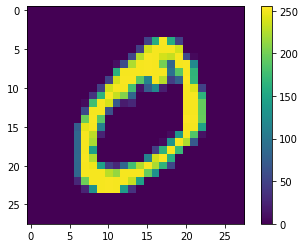

In [3]:
# let's look at what some of these images look like!
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

In [4]:
train_images = train_images / 255.0

test_images = test_images / 255.0

In [21]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(14, activation='relu'), 
    keras.layers.Dense(14, activation='relu'), 
    keras.layers.Dense(10, activation='softmax')
])

In [22]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [23]:
model.fit(train_images, train_labels, epochs=15)  

Epoch 1/15
1875/1875 [==============================] - 3s 1ms/step - loss: 0.7926 - accuracy: 0.7573
Epoch 2/15
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2495 - accuracy: 0.9288
Epoch 3/15
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2129 - accuracy: 0.9390
Epoch 4/15
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1886 - accuracy: 0.9448
Epoch 5/15
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1706 - accuracy: 0.9503
Epoch 6/15
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1638 - accuracy: 0.9518
Epoch 7/15
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1507 - accuracy: 0.9563
Epoch 8/15
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1474 - accuracy: 0.9581
Epoch 9/15
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1424 - accuracy: 0.9579
Epoch 10/15
1875/1875 [==============================] - 2s 1ms/step - loss: 0.138

In [24]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1) 

print('Test accuracy:', test_acc)

313/313 [==============================] - 0s 955us/step - loss: 0.1883 - accuracy: 0.9473
Test accuracy: 0.9473000168800354


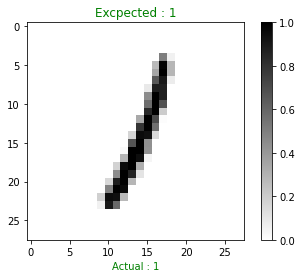

In [34]:
COLOR = 'green'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
    class_names = ['0','1','2','3','4','5','6','7','8','9']
    prediction = model.predict(np.array([image]))
    predicted_class = class_names[np.argmax(prediction)]

    show_image(image, class_names[correct_label], predicted_class)


def show_image(img, label, guess):
    plt.figure()
    plt.imshow(img, cmap=plt.cm.binary)
    plt.title("Excpected : " + label)
    plt.xlabel("Actual : " + guess)
    plt.colorbar()
    plt.grid(False)
    plt.show()


x = random.randint(0,len(test_images))
image = test_images[x]
label = test_labels[x]
predict(model, image, label)